https://boyangzhao.github.io/posts/mcmc-bayesian-inference

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import arviz as az

In [2]:
# generate observed data
X = st.norm(loc=2, scale=1).rvs(size=1000)

(array([  4.,  27.,  79., 159., 244., 238., 145.,  87.,  14.,   3.]),
 array([-1.205938  , -0.55158753,  0.10276294,  0.7571134 ,  1.41146387,
         2.06581433,  2.7201648 ,  3.37451527,  4.02886573,  4.6832162 ,
         5.33756666]),
 <BarContainer object of 10 artists>)

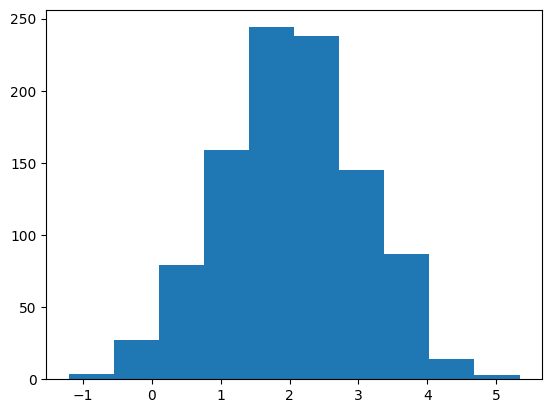

In [3]:
plt.hist(X)

Multiprocess sampling (3 chains in 4 jobs)
Metropolis: [mu]


/home/singh087/UofG/work/Code/HMtest/lib/python3.10/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),


/home/singh087/UofG/work/Code/HMtest/lib/python3.10/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/home/singh087/UofG/work/Code/HMtest/lib/python3.10/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (3 chains in 4 jobs)
NUTS: [mu]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 0 seconds.


array([[<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>]],
      dtype=object)

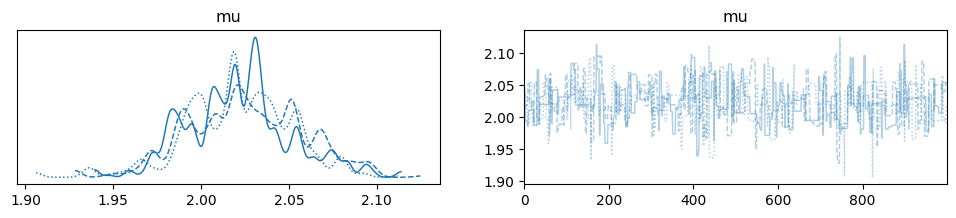

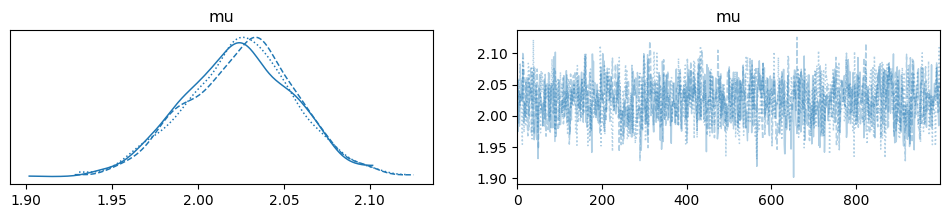

In [4]:
import pymc3 as pm

with pm.Model() as model:

    prior = pm.Normal('mu', mu=0, sigma=1)  # prior
    obs = pm.Normal('obs', mu=prior, sigma=1, observed=X)  # likelihood

    # sample with 3 independent Markov chains
    trace_METROPOLIS = pm.sample(draws=1000, chains=3, step=pm.Metropolis(), return_inferencedata=True)  
    trace_NUTS = pm.sample(draws=1000, chains=3, step=pm.NUTS(), return_inferencedata=True)  

az.plot_trace(trace_METROPOLIS, var_names=('mu'))
az.plot_trace(trace_NUTS, var_names=('mu'))

In [5]:
az.summary(trace_METROPOLIS, var_names=["mu"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,2.023,0.031,1.97,2.083,0.002,0.001,403.0,384.0,1.01


In [6]:
az.summary(trace_NUTS, var_names=["mu"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,2.025,0.032,1.963,2.081,0.001,0.001,1337.0,1932.0,1.0
